In [131]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [132]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)
data = StringIO(response.text)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(data, header=None, names=column_names)
df

/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [133]:
print(df.head())
print(df.info())
print(df.describe().T)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6

In [134]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [135]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

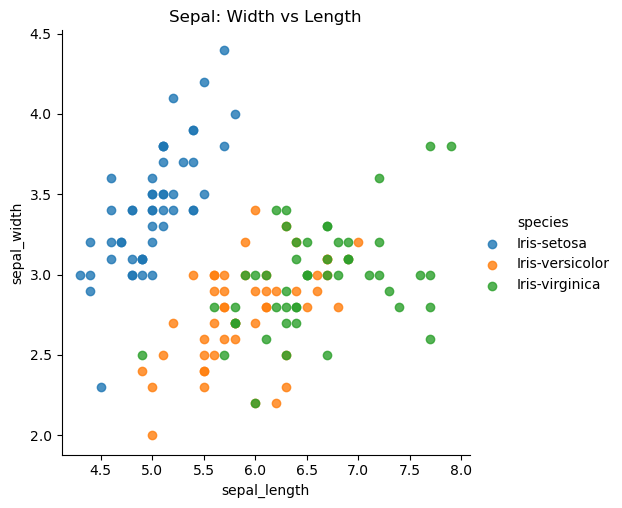

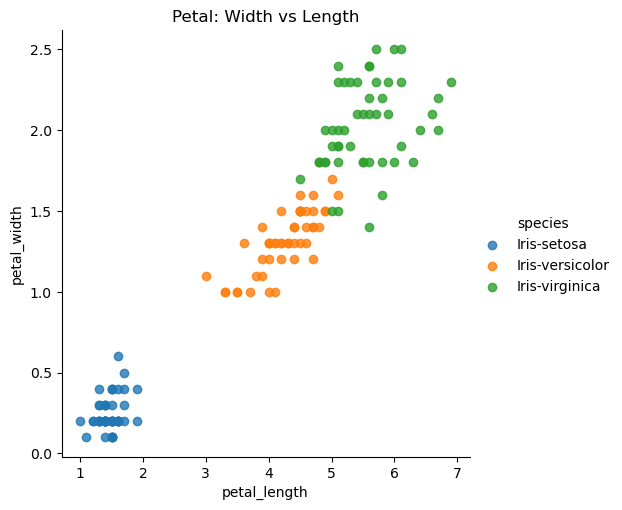

In [136]:
sns.lmplot(data=df, x="sepal_length", y="sepal_width", hue="species", fit_reg=False)
plt.title("Sepal: Width vs Length")
plt.show()

sns.lmplot(data=df, x="petal_length", y="petal_width", hue="species", fit_reg=False)
plt.title("Petal: Width vs Length")
plt.show()

In [137]:
le = LabelEncoder()
df.species = le.fit_transform(df.species)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [138]:
X = df.iloc[:, 0:4].values 
Y = df.iloc[:, 4].values    


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [141]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


In [142]:
report = classification_report(y_test, y_pred, output_dict=True)
print("Metrics for class 1:")
print(f"Precision: {report['1']['precision']:.2f}")
print(f"Recall:    {report['1']['recall']:.2f}")
print(f"F1 Score:  {report['1']['f1-score']:.2f}")
print(f"Support:   {report['1']['support']}")


Metrics for class 1:
Precision: 1.00
Recall:    1.00
F1 Score:  1.00
Support:   13.0


In [143]:
k_values = [1, 3, 5, 10, 20, 50]
results = []
result2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    correct = np.sum(y_pred == y_test)
    results.append((k, acc, correct))
    result2.append((k,acc))
# Print result table
for k, acc, correct in results:
    print(f"k={k}: Accuracy={acc:.2f}, Correct Predictions={correct}/{len(y_test)}")

k=1: Accuracy=1.00, Correct Predictions=45/45
k=3: Accuracy=1.00, Correct Predictions=45/45
k=5: Accuracy=1.00, Correct Predictions=45/45
k=10: Accuracy=1.00, Correct Predictions=45/45
k=20: Accuracy=1.00, Correct Predictions=45/45
k=50: Accuracy=0.96, Correct Predictions=43/45


In [155]:
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((scores.mean(), k))  # Append a tuple containing both values
cv_scores
for acc, k in cv_scores:
    print(f"k={k}: Accuracy={acc:.2f}, Correct Predictions={correct}/{len(y_test)}")

k=1: Accuracy=0.94, Correct Predictions=43/45
k=3: Accuracy=0.94, Correct Predictions=43/45
k=5: Accuracy=0.94, Correct Predictions=43/45
k=10: Accuracy=0.94, Correct Predictions=43/45
k=20: Accuracy=0.93, Correct Predictions=43/45
k=50: Accuracy=0.88, Correct Predictions=43/45


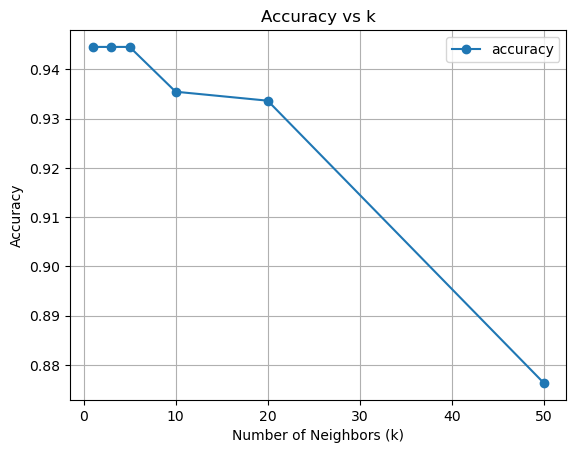

In [157]:
df_results = pd.DataFrame(cv_scores, columns=['accuracy', 'k'])  # Note the order: accuracy, k

df_results.plot(x='k', y='accuracy', marker='o', title='Accuracy vs k', grid=True)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()